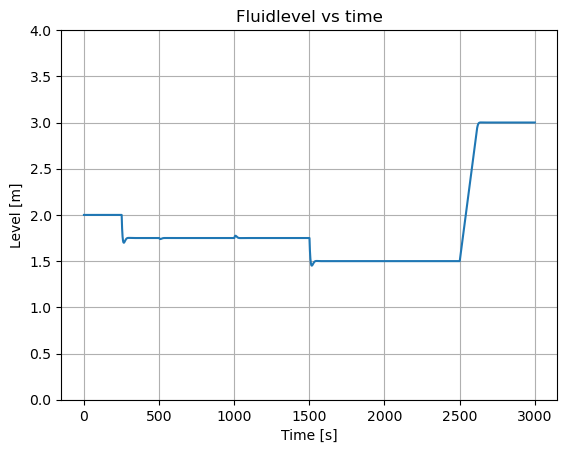

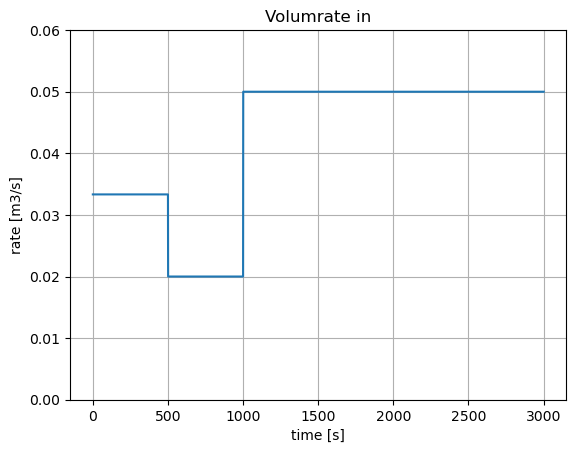

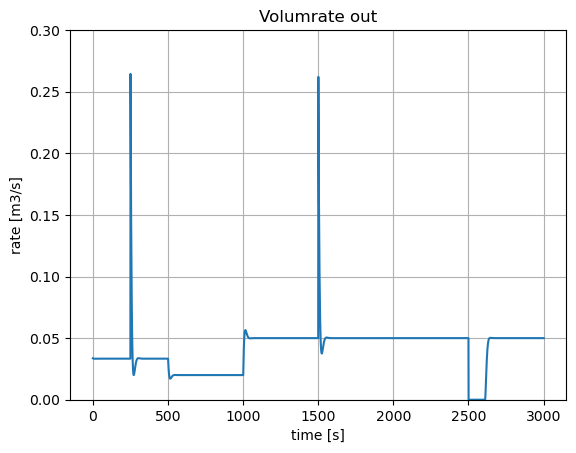

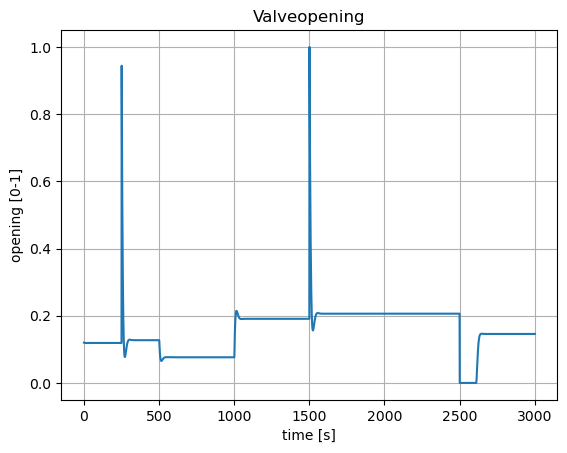

In [1]:

import math
import matplotlib.pyplot as plt

timestep=1 #s
time=0 # s
endtime = 3000# s
qin = 0.03333 # m3/s  Inflow rate (2000 l/m)
rho = 1000 # density of fluid  kg/m3
k = 0.002
keff=k*math.sqrt(rho)
zold = 0.12  # Initial valve opening
g = 9.81 # m/s2
h_old = 2 #   Initial liquid level (m)
A = 4 # Area of tank m2  

qout = keff*zold*math.sqrt(g*h_old)

h_setp=2.0  # Initial setpoint

# Gain parameters in discrete PI scheme

kp = 3.0
ki = 0.3

# Initial error at previous timelevel

eold = h_old-h_setp



h = [] # empty list for liquid level h
t = [] # empty list for time
q_in =[] # empty list for flowrate in
q_out=[] # empty list for flowrate out
z_opening =[] # empty list for valve opening

# Add initial conditions to lists
h.append(h_old)
t.append(time)
q_in.append(qin)
q_out.append(qout)
z_opening.append(zold)

while time<=endtime:  # Controls the time simulation
    
    time = time+timestep
    h_new=h_old+1/A*(qin-qout)*timestep  # Euler method
    
    # Constraints
    
    if h_new<0:
        h_new=0.0
    if h_new>4:
        h_new=4.0
    
    
    # Here one can insert code related to changes in inlet rate
    # or valve opening
    
    if time>250:
        h_setp=1.75
    
    if time>500:
        qin = 0.02
        
    if time>1000:
        qin = 0.05
        
    if time>1500:
        h_setp=1.5
        
    if time >2500:
        h_setp=3.0 
            
    enew = h_new-h_setp
    
    # PI controller 
    
    znew = zold+kp*(enew-eold)+ki*enew*timestep
    
    # Constraints on valve opening:
    
    if znew<=0:
        znew=0
    if znew>=1:
        znew=1
    
    qout = keff*znew*math.sqrt(g*h_new) 
    
    h.append(h_new)
    t.append(time)
    q_in.append(qin)
    q_out.append(qout)
    z_opening.append(znew)
  
    # set old values equal to new values to prepare for next time step. 
    h_old = h_new
    zold  = znew
    eold = enew
    
#  Plotting section 
    
plt.plot(t,h)
# Make title
plt.title('Fluidlevel vs time')
# Make text on x axis
plt.xlabel('Time [s]')
# Make text on y axis    
plt.ylabel('Level [m]')
# Insert gridlines    
plt.grid(True)
# Limit the y axis  
plt.ylim(ymin=0,ymax = 4)    
plt.show()




plt.plot(t,q_in)


# Lage tittel
plt.title('Volumrate in')
# Lage tekst på x aksen
plt.xlabel('time [s]')
# Lage tekst på y aksen    
plt.ylabel('rate [m3/s]')
# Sette inn gridlinjer    
plt.grid(True)
# Styre bildet av grafen (x koord)    
#plt.xlim(xmin=0,xmax = 100)
# Styre bildet av grafen (y koord)        
plt.ylim(ymin=0,ymax = 0.06)    
plt.show()


plt.plot(t,q_out)


# Lage tittel
plt.title('Volumrate out')
# Lage tekst på x aksen
plt.xlabel('time [s]')
# Lage tekst på y aksen    
plt.ylabel('rate [m3/s]')
# Sette inn gridlinjer    
plt.grid(True)
# Styre bildet av grafen (x koord)    
#plt.xlim(xmin=0,xmax = 100)
# Styre bildet av grafen (y koord)        
plt.ylim(ymin=0,ymax = 0.3)    
plt.show()


plt.plot(t,z_opening)


# Lage tittel
plt.title('Valveopening')
# Lage tekst på x aksen
plt.xlabel('time [s]')
# Lage tekst på y aksen    
plt.ylabel('opening [0-1]')
# Sette inn gridlinjer    
plt.grid(True)
# Styre bildet av grafen (x koord)    
#plt.xlim(xmin=0,xmax = 100)
# Styre bildet av grafen (y koord)        
#plt.ylim(ymin=0,ymax = 4)    
plt.show()




In [14]:
print(z_opening[0])

0.12


In [17]:
print(z_opening[0:40])


[0.12, 0.11976311074888904, 0.11955993218338219, 0.11938757820254682, 0.11924312819397334, 0.11912369551427077, 0.11902648076824224, 0.11894881198777073, 0.11888817364014305, 0.11884222622073536, 0.11880881801078896, 0.11878599041084457, 0.11877197809679103, 0.11876520509042221, 0.11876427769126507, 0.11876797508210704, 0.11877523829769601, 0.11878515813461238, 0.118796962480266, 0.11881000345003333, 0.1188237446432323, 0.11883774876034883, 0.11885166576500872, 0.11886522172384636, 0.11887820841498484, 0.11889047376043653, 0.11890191310871223, 0.11891246137045516, 0.11892208599141098, 0.11893078073275581, 0.11893856021818966, 0.11894545519970792, 0.11895150848904418, 0.1189567714990336, 0.11896130133816725, 0.1189651584019965, 0.1189684044065775, 0.11897110081147619, 0.1189733075828, 0.11897508225011058]


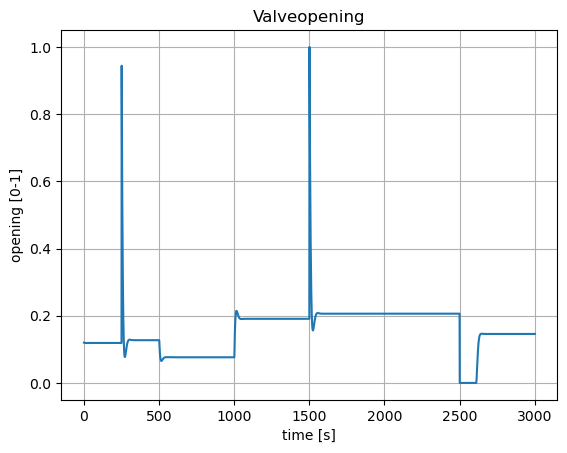

In [2]:
plt.plot(t,z_opening)


# Lage tittel
plt.title('Valveopening')
# Lage tekst på x aksen
plt.xlabel('time [s]')
# Lage tekst på y aksen    
plt.ylabel('opening [0-1]')
# Sette inn gridlinjer    
plt.grid(True)
# Styre bildet av grafen (x koord)    
#plt.xlim(xmin=0,xmax = 100)
# Styre bildet av grafen (y koord)        
#plt.ylim(ymin=0,ymax = 4)    
plt.show()
